# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [ ]:
3 * A

In [ ]:
A + A

In [ ]:
A * A

In [ ]:
A / A

In [ ]:
A - A

In [ ]:
A + B

In [ ]:
A * B

### Dot product

In [ ]:
A.shape

In [ ]:
B.shape

In [ ]:
A.dot(B)

In [ ]:
np.dot(A, B)

In [ ]:
B.dot(A)

In [ ]:
C.shape

In [ ]:
A.shape

In [ ]:
C.dot(A)

In [ ]:
A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [12]:
df = pd.read_csv('../data/banknotes.csv')

In [13]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [14]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [15]:
import seaborn as sns

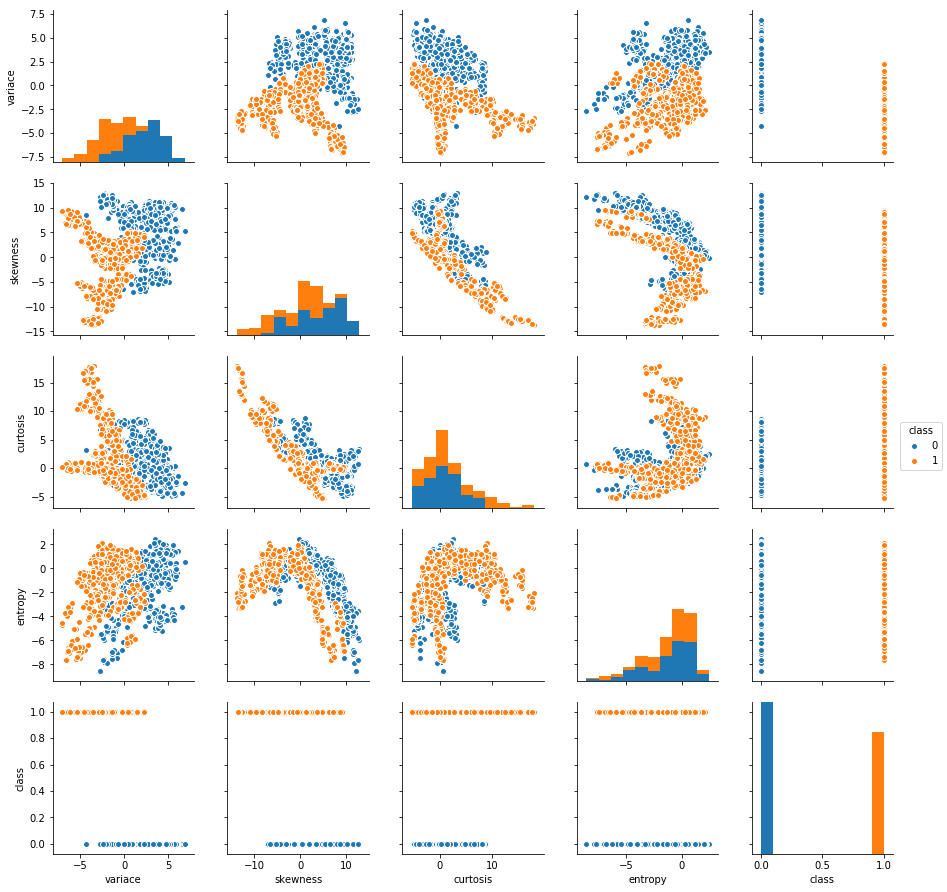

In [16]:
sns.pairplot(df, hue="class")

#### Baseline model

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [19]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [20]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99126638, 0.98468271, 0.99343545])

### Logistic Regression Model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [22]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [23]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/1
412/412 [==============================] - 0s 76us/step


In [24]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5,1,'Test accuracy: 34.7 %')

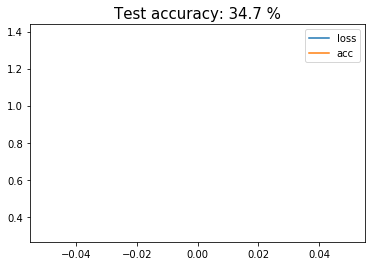

In [29]:
historydf.plot()
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [30]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [31]:
historydf = pd.concat(dflist, axis=1)

In [32]:
historydf

,loss,acc,loss,acc,loss,acc,loss,acc
0,0.570134,0.65,0.700853,0.547917,0.543518,0.710417,0.228546,0.930208


In [33]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [34]:
historydf

learning_rate      0.01            0.05                0.10            \
metric             loss   acc      loss       acc      loss       acc   
0              0.570134  0.65  0.700853  0.547917  0.543518  0.710417   

learning_rate      0.50            
metric             loss       acc  
0              0.228546  0.930208

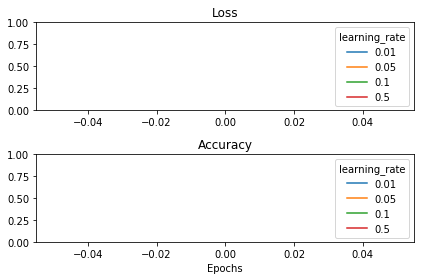

In [35]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [36]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [37]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [38]:
historydf

batch_size       16                  32                  64             \
metric          loss       acc      loss       acc      loss       acc   
0           0.663452  0.608333  0.461153  0.828125  1.290492  0.334375   

batch_size       128            
metric          loss       acc  
0           0.569662  0.660417

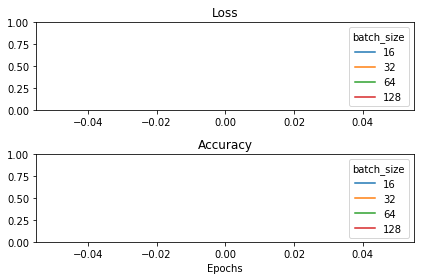

In [39]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [40]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [41]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [42]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

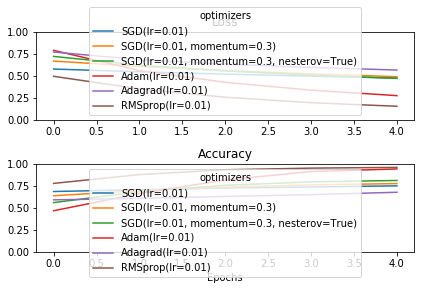

In [43]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [44]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [45]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

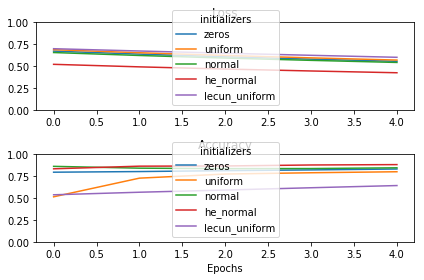

In [46]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [47]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s 326us/step - loss: 0.6576 - acc: 0.6414 - val_loss: 0.6135 - val_acc: 0.6354
Epoch 2/20
672/672 [==============================] - 0s 135us/step - loss: 0.5091 - acc: 0.7634 - val_loss: 0.4300 - val_acc: 0.8507
Epoch 3/20
672/672 [==============================] - 0s 135us/step - loss: 0.3215 - acc: 0.9077 - val_loss: 0.2470 - val_acc: 0.9479
Epoch 4/20
672/672 [==============================] - 0s 138us/step - loss: 0.1953 - acc: 0.9420 - val_loss: 0.1504 - val_acc: 0.9618
Epoch 5/20
672/672 [==============================] - 0s 139us/step - loss: 0.1275 - acc: 0.9643 - val_loss: 0.0964 - val_acc: 0.9757
Epoch 6/20
672/672 [==============================] - 0s 138us/step - loss: 0.0877 - acc: 0.9717 - val_loss: 0.0642 - val_acc: 0.9792
Epoch 7/20
672/672 [==============================] - 0s 143us/step - loss: 0.0622 - acc: 0.9777 - val_loss: 0.0461 - val_acc: 0.9861
Epoch 8/20
672/6

In [48]:
result

[0.027371380654462044, 0.9878640776699029]

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.layers

In [51]:
inp = model.layers[0].input
out = model.layers[0].output

In [52]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [53]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [54]:
features_function = K.function([inp], [out])

In [55]:
features_function

In [56]:
features_function([X_test])[0].shape

(412, 2)

In [57]:
features = features_function([X_test])[0]

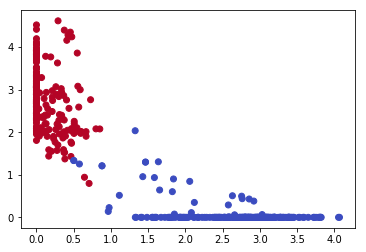

In [58]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [61]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

412/412 [==============================] - 0s 27us/step


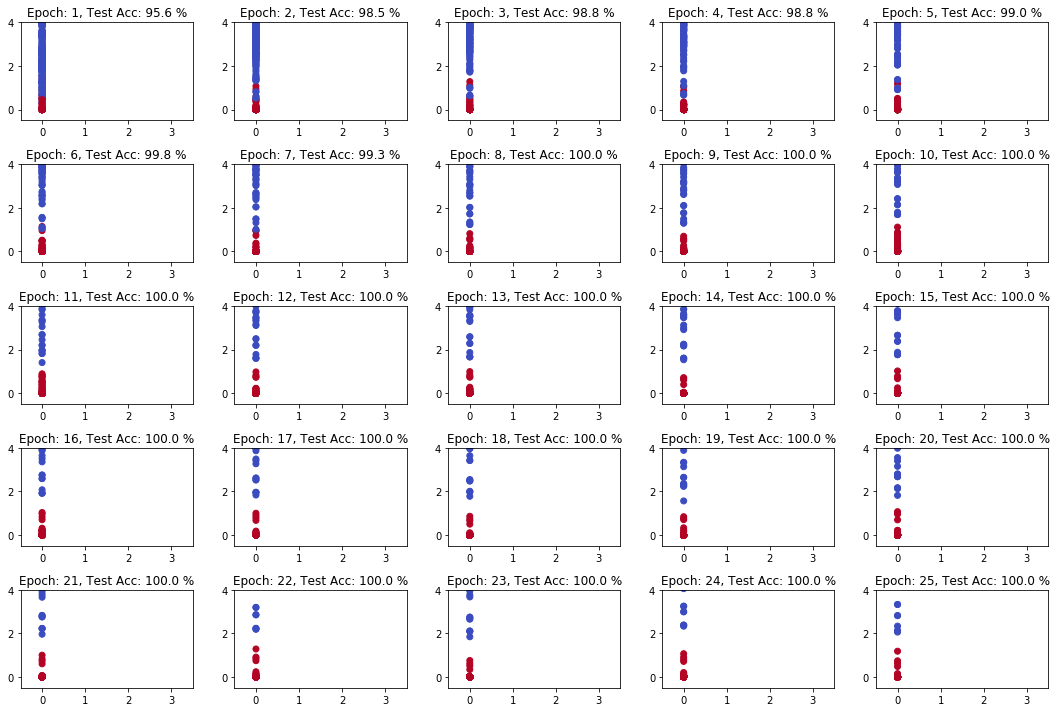

In [62]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [ ]:
df = pd.read_csv('../data/wines.csv')

sns.pairplot(df, hue='Class')

In [112]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X = df.loc[:,df.columns!='Class']
X = pd.DataFrame(mms.fit_transform(X))

y = df[['Class']]

from keras.utils import np_utils

uniques, ids = np.unique(y, return_inverse=True)
y_code = np_utils.to_categorical(ids, len(uniques))


In [ ]:
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

X_train, X_test, y_train, y_test = train_test_split(X, y_code, test_size=0.2)

K.clear_session()

model = Sequential()
model.add(Dense(16, input_shape=(13,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(Adam(0.1),loss='categorical_crossentropy',metrics=['accuracy'])


history = model.fit(X_train, y_train, batch_size=128,epochs=100, validation_split=0.2)
result = model.evaluate(X_test, y_test)

print(result)

In [131]:
y_test_pred = np.argmax(model.predict(X_test), axis=1)
y_train_pred = np.argmax(model.predict(X_train), axis=1)

y_test_true = np.argmax(y_test,axis=1)
y_train_true = np.argmax(y_train,axis=1)


from sklearn.metrics import accuracy_score,classification_report
print("The accuracy train score is {:0.3f}".format(accuracy_score(y_test_pred, y_test_true)))
print(classification_report(y_test_pred, y_test_true))

print("The accuracy test score is {:0.3f}".format(accuracy_score(y_train_pred, y_train_true)))
print(classification_report(y_train_pred, y_train_true))

The accuracy train score is 0.972
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      0.93      0.97        15
          2       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        36

The accuracy test score is 0.993
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        48
          1       0.98      1.00      0.99        56
          2       1.00      1.00      1.00        38

avg / total       0.99      0.99      0.99       142



### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [ ]:
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

X_train, X_test, y_train, y_test = train_test_split(X, y_code, test_size=0.2)



optimizers = ['Adam(lr=0.01)',  
              'Adam(lr=0.04)',  
              'Adam(lr=0.08)']

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

activations = ['relu','tanh','sigmoid']

max_result = 0
max_str = ''
for act in activations:
    for opt in optimizers:
        for init in initializers:
            K.clear_session()

            model = Sequential()
            model.add(Dense(8, input_shape=(13,), activation=act, kernel_initializer=init))
            model.add(Dense(5, activation=act, kernel_initializer=init))
            model.add(Dense(2, activation=act,kernel_initializer=init))
            model.add(Dense(3, activation='softmax',kernel_initializer=init))

            model.compile(optimizer=eval(opt),loss='categorical_crossentropy',metrics=['accuracy'])


            history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=0)
            result = model.evaluate(X_test, y_test)

            str_s = act + ":" + str(opt) + ":" + str(init) + ":" + str(result)
            if result[1] > max_result:
                max_result = result[1]
                max_str = str_s
                
            print(str_s)
            
print("Best result: ", max_str)

In [162]:
model = Sequential()
model.add(Dense(8, input_shape=(13,), activation='tanh', kernel_initializer='lecun_uniform'))
model.add(Dense(5, activation='tanh', kernel_initializer='lecun_uniform'))
model.add(Dense(2, activation='tanh',kernel_initializer='lecun_uniform'))
model.add(Dense(3, activation='softmax',kernel_initializer='lecun_uniform'))

model.compile(optimizer=eval('Adam(lr=0.04)'),loss='categorical_crossentropy',metrics=['accuracy'])


history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=0)
result = model.evaluate(X_test, y_test)

36/36 [==============================] - 0s 77us/step


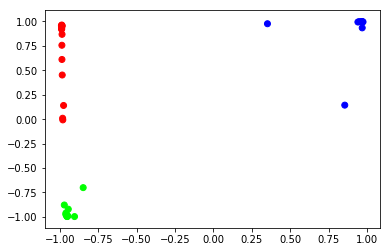

In [163]:
inp = model.layers[0].input
out = model.layers[2].output

features_function = K.function([inp], [out])

features = features_function([X_test])[0]

plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [172]:
from keras.layers import Input, Dense
from keras.models import Model

K.clear_session()

# This returns a tensor
inputs = Input(shape=(13,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(8, activation='relu')(inputs)
x = Dense(5, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=Adam(0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_split=0.2)  # starts training
result = model.evaluate(X_test, y_test)

print(result)

Train on 113 samples, validate on 29 samples
Epoch 1/100
113/113 [==============================] - 0s 2ms/step - loss: 1.0792 - acc: 0.4336 - val_loss: 1.0506 - val_acc: 0.4828
Epoch 2/100
113/113 [==============================] - 0s 118us/step - loss: 1.0758 - acc: 0.3451 - val_loss: 1.0196 - val_acc: 0.4483
Epoch 3/100
113/113 [==============================] - 0s 132us/step - loss: 1.0121 - acc: 0.4690 - val_loss: 0.9801 - val_acc: 0.5517
Epoch 4/100
113/113 [==============================] - 0s 128us/step - loss: 0.9944 - acc: 0.4956 - val_loss: 0.9604 - val_acc: 0.4828
Epoch 5/100
113/113 [==============================] - 0s 126us/step - loss: 0.9442 - acc: 0.5487 - val_loss: 0.9220 - val_acc: 0.5172
Epoch 6/100
113/113 [==============================] - 0s 121us/step - loss: 0.8998 - acc: 0.5664 - val_loss: 0.8748 - val_acc: 0.5517
Epoch 7/100
113/113 [==============================] - 0s 117us/step - loss: 0.8985 - acc: 0.5487 - val_loss: 0.8279 - val_acc: 0.5862
Epoch 8/100


Epoch 61/100
113/113 [==============================] - 0s 124us/step - loss: 0.3867 - acc: 0.8938 - val_loss: 0.1983 - val_acc: 1.0000
Epoch 62/100
113/113 [==============================] - 0s 133us/step - loss: 0.4780 - acc: 0.8142 - val_loss: 0.2163 - val_acc: 0.9655
Epoch 63/100
113/113 [==============================] - 0s 116us/step - loss: 0.4250 - acc: 0.8584 - val_loss: 0.1661 - val_acc: 1.0000
Epoch 64/100
113/113 [==============================] - 0s 118us/step - loss: 0.4436 - acc: 0.8496 - val_loss: 0.1493 - val_acc: 1.0000
Epoch 65/100
113/113 [==============================] - 0s 116us/step - loss: 0.5188 - acc: 0.7788 - val_loss: 0.1649 - val_acc: 0.9655
Epoch 66/100
113/113 [==============================] - 0s 113us/step - loss: 0.4163 - acc: 0.8584 - val_loss: 0.2154 - val_acc: 0.9655
Epoch 67/100
113/113 [==============================] - 0s 117us/step - loss: 0.3547 - acc: 0.8673 - val_loss: 0.1934 - val_acc: 0.9655
Epoch 68/100
113/113 [==========================

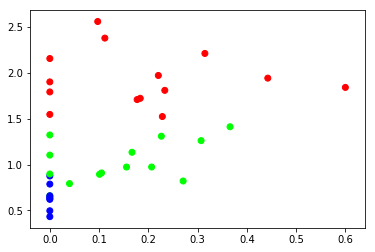

In [178]:
inp = model.layers[0].input
out = model.layers[1].output

features_function = K.function([inp], [out])

features = features_function([X_test])[0]

plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y_code, test_size=0.3, random_state=42)

from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

K.clear_session()

a = EarlyStopping(monitor='val_loss', min_delta=0, patience=1, verbose=1, mode='auto')
b = ModelCheckpoint(filepath='../models/course5.hdf5', verbose=1, save_best_only=True)
c = TensorBoard(log_dir='./logs/2',write_graph=True, write_images=True)

callbacks = [a, b, c]
# This returns a tensor

model = Sequential()
model.add(Dense(8, input_shape=(13,), activation='tanh', kernel_initializer='lecun_uniform'))
model.add(Dense(5, activation='tanh', kernel_initializer='lecun_uniform'))
model.add(Dense(2, activation='tanh',kernel_initializer='lecun_uniform'))
model.add(Dense(3, activation='softmax',kernel_initializer='lecun_uniform'))

model.compile(optimizer=eval('Adam(lr=0.04)'),loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),callbacks=callbacks)  # starts training
result = model.evaluate(X_test, y_test)

print(result)

Train on 124 samples, validate on 54 samples
Epoch 1/100
124/124 [==============================] - 0s 1ms/step - loss: 1.0628 - acc: 0.2742 - val_loss: 0.8688 - val_acc: 0.6111

Epoch 00001: val_loss improved from inf to 0.86877, saving model to ../models/course5.hdf5
Epoch 2/100
124/124 [==============================] - 0s 96us/step - loss: 0.8036 - acc: 0.6532 - val_loss: 0.6814 - val_acc: 0.6296

Epoch 00002: val_loss improved from 0.86877 to 0.68137, saving model to ../models/course5.hdf5
Epoch 3/100
124/124 [==============================] - 0s 114us/step - loss: 0.6484 - acc: 0.6613 - val_loss: 0.6024 - val_acc: 0.6296

Epoch 00003: val_loss improved from 0.68137 to 0.60244, saving model to ../models/course5.hdf5
Epoch 4/100
124/124 [==============================] - 0s 105us/step - loss: 0.5810 - acc: 0.6694 - val_loss: 0.5855 - val_acc: 0.6296

Epoch 00004: val_loss improved from 0.60244 to 0.58549, saving model to ../models/course5.hdf5
Epoch 5/100
124/124 [=================